# Resources

In [2]:
#https://en.wikipedia.org/wiki/Islamic_attitudes_towards_science
#https://zamzam.com/blog/scientific-facts-in-quran/
#https://www.pewresearch.org/religion/2020/08/26/on-the-intersection-of-science-and-religion/

# Importing lib

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore") 
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import pandas as pd
import numpy as np
import scipy
import string
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('vader_lexicon')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Dataset

In [5]:
data = [
{
'Topic': 'Barrier between Sweet and Salt Waters',
'Surah': '',
'Islamic_Data': 'He has let free the two bodies of flowing water, meeting together: between them is a barrier which they do not transgress.',
'Scientific_Data': 'At the boundary where freshwater rivers meet the ocean, there is a visible separation due to differences in density and␣salinity. This barrier prevents easy mixing of the two types of water.'
},
{
'Topic': 'Botany',
'Surah': 'Taha',
'Islamic_Data': '"And has sent down water from the sky. With it have We produced diverse pairs of plants each separate from the others."',
'Scientific_Data': 'Plants reproduce through various methods, including seeds. The verse metaphorically refers to the diversity of plant life and their reproductive processes, which include male and female parts.'
},
{
'Topic': "Spider's Web",
'Surah': 'Al-Ankabut',
'Islamic_Data': '"The parable of those who take protectors other than Allah is that of the spider, who builds (to itself) a house; but truly the flimsiest of houses is the spider’s house; if they but knew."',
'Scientific_Data': 'The verse likens the flimsiness of the spider’s web to the fragility of relying on false protectors. It also reflects the delicate nature of a spider’s web, which is made of silk proteins.'
},    
    {
'Topic': 'The Water Cycle',
'Surah': 'Az-Zumar',
'Islamic_Data': '"Seest thou not that Allah sends down rain from the sky, and leads it through springs in the earth? Then He causes to grow, therewith, produce of various colors."',
'Scientific_Data': 'The verse metaphorically describes the water cycle, where water evaporates, forms clouds, and eventually falls as rain. This process sustains plant growth and various ecosystems on Earth.'
},
{
'Topic': 'Water',
'Surah': 'Al-Anbya',
'Islamic_Data': '"We made every living thing from water, will they not believe?"',
'Scientific_Data': 'It was only after the discovery of the microscope that it was concluded...'
},
    
{
'Topic': 'Universe: The Big Crunch Theory',
'Surah': 'Al-Anbya',
'Islamic_Data': '"The Day when We will fold the heaven like the folding of a [written] sheet for the records. As We began the first creation, We shall repeat it. [It is] a promise binding upon Us. Indeed, We will do it."',
'Scientific_Data': 'Indeed, the Big Crunch is one of the scenarios predicted by scientists in which the Universe may end...'
},
      
{
'Topic': 'Force of Gravity',
'Surah': 'Al-Rafi',
'Islamic_Data': '"It is Allah who raised the heavens without any pillars that you see, and then presided over the Throne. He disposed the sun and the moon, each moving for a specified term. He directs the command, [and] elaborates thesigns that you may be certain of encountering your Lord."',
'Scientific_Data': '"We know that before the time of Newton, that great scientific personality, no one was aware of the force of gravity. Newton proved that the falling of objects to earth, the rotation of the moon and the Venus, the motion of the planets, and other instances of attraction are all subject to the single law, the law of universal gravity.'
},
      
    {
'Topic': '',
'Surah': '',
'Islamic_Data': '',
'Scientific_Data': ''
},
    
    {
'Topic': 'Production of Milk in Animals',
'Surah': 'Ayah an-Nahl',
'Islamic_Data': '"“There is in truth for you a lesson in your animals and flocks. We give you to drink a pure milk derived from that which is contained in their bodies, from the merging of what is held in their intestines with blood. The drinking of that is then made easy for those who drink it."',
'Scientific_Data': 'The substances that ensure the general nutrition of the body come from chemical transformations which occur along the length of the digestive tract. These substances come from the contents of the intestine. On arrivalin the intestine at the appropriate stage of chemical transformation, they pass through its wall and towards the systemic circulation (of blood). This veryprecise concept is the result of the discoveries made in the chemistry and physiology of the digestive system.'
},
   
{
'Topic': 'The Sky’s Protection',
'Surah': 'Al-Anbya',
'Islamic_Data': '"And We made the sky a protected ceiling, but they, from its signs, are turning away"',
'Scientific_Data': 'It is a scientific fact that the sky, with all of its gases, protects the earth and life that is present on it...'
},
{
'Topic': 'Iron within Meteorites',
'Surah': 'Al-Hadid',
'Islamic_Data': '"We sent down Iron with its great inherent strength and its many benefits for humankind"',
'Scientific_Data': 'According to M. E. Walrath, iron is not natural to the earth. Scientists state that billions of years ago...'
},
{
'Topic': 'The Meeting of the Seas',
'Surah': 'Ar-Rahman',
'Islamic_Data': '"He released the two seas, meeting [side by side], Between them is a barrier [so] neither of them transgresses"',
'Scientific_Data': 'Science has discovered that in places where two different seas meet, there is a barrier that divides them which has a unique chemical composition...'
},
    {
'Topic': 'Sun Moving in Orbit',
'Surah': 'Al-Anbya',
'Islamic_Data': '"And it is He who created the night and the day and the sun and the moon; all [heavenly bodies] in an orbit are swimming."',
'Scientific_Data': 'Although it was only a widespread belief in the 20th century amongst the astronomers, today it is a well-established fact...'
},
{
'Topic': 'Expansion of the Universe',
'Surah': 'An-Naba',
'Islamic_Data': '"And the heaven We constructed with strength, and indeed, We are [its] expander"',
'Scientific_Data': 'According to the prominent physicist Stephen Hawking in his book A Brief History of Time, “The discovery that the Universe is expanding is one of the great intellectual revolutions of the 20th century..."'
},
{
'Topic': 'Pain Receptors',
'Surah': 'Adh-Dhariyat',
'Islamic_Data': '"For a long time it was thought that the sense of feeling and pain was dependent on the brain. However, it has been discovered that there are pain receptors present in the skin that give us the sense of pain."',
'Scientific_Data': 'For a long time, it was thought that the sense of feeling and pain was dependent on the brain. However, it has been discovered that there are pain receptors in the skin...'
},
{
'Topic': 'Internal Waves in the Oceans',
'Surah': 'An-Nur',
'Islamic_Data': '"Incredibly, oceanographers have stated that unlike the belief that waves only occur on the surface, there are waves deep in then ocean that are as great as 100 feet high."',
'Scientific_Data': 'Incredibly, oceanographers have stated that unlike the belief that waves only occur on the surface, there are waves deep in the ocean that are as great as 100 feet high...'
},
{
'Topic': '',
'Surah': '',
'Islamic_Data': '"Seest thou not that Allah sends down rain from the sky, and leads it through springs in the earth? Then He causes to grow, therewith, produce of various colors."',
'Scientific_Data': 'In 1580, Bernard Palissy was the first man to describe the present day concept of the "water cycle." He described how water evaporates from the oceans and forms clouds...'
} ]

In [6]:
df = pd.DataFrame(data)
filee = 'data.csv'
df.to_csv(filee, index=False)

# Data Preprocessing

In [7]:
df=pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Topic            15 non-null     object
 1   Surah            14 non-null     object
 2   Islamic_Data     16 non-null     object
 3   Scientific_Data  16 non-null     object
dtypes: object(4)
memory usage: 672.0+ bytes


In [8]:
df.shape

(17, 4)

In [9]:
df.isna().sum()

Topic              2
Surah              3
Islamic_Data       1
Scientific_Data    1
dtype: int64

In [10]:
df = df.dropna()
df.isna().sum()

Topic              0
Surah              0
Islamic_Data       0
Scientific_Data    0
dtype: int64

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(14, 4)

In [13]:
df1 = df.copy()
# Loop through each numeric column in the DataFrame
for i in df1.select_dtypes(include='number'):
# Calculate the first quartile (Q1) and third quartile (Q3) for the specific column
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define the upper and lower bounds to identify outliers
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    df1[i] = df1[i].apply(lambda x: x if lower_b <= x <= upper_b else None)
df.dropna(subset=df1.columns, inplace=True)

# Removing Stop Words & Punctaions

In [14]:
def clean_text(arg):
    arg = arg.lower()
    arg = arg.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(arg)
    stop_words = set(stopwords.words('english'))
    arg = re.sub(re.escape(string.punctuation), '', arg)
    arg = re.sub(r'^[a-zA-Z]\s+', '', arg)
    arg = re.sub(r'\s+', ' ', arg, flags=re.I)
    arg = re.sub(r'^b\s+', '', arg)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text
df['cleaned_scientific_data'] = df['Scientific_Data'].apply(clean_text)
print(df['cleaned_scientific_data'])
print("\n\n\n")
df['cleaned_islamic_data'] = df['Islamic_Data'].apply(clean_text)
print(df['cleaned_islamic_data'])

1     plants reproduce various methods including see...
2     verse likens flimsiness spider ’ web fragility...
3     verse metaphorically describes water cycle wat...
4                        discovery microscope concluded
5     indeed big crunch one scenarios predicted scie...
6     know time newton great scientific personality ...
8     substances ensure general nutrition body come ...
9     scientific fact sky gases protects earth life ...
10    according e walrath iron natural earth scienti...
11    science discovered places two different seas m...
12    although widespread belief 20th century amongs...
13    according prominent physicist stephen hawking ...
14    long time thought sense feeling pain dependent...
15    incredibly oceanographers stated unlike belief...
Name: cleaned_scientific_data, dtype: object




1     sent water sky produced diverse pairs plants s...
2     parable take protectors allah spider builds ho...
3     seest thou allah sends rain sky leads springs ...

# Word Cloud For islamic Discovery 

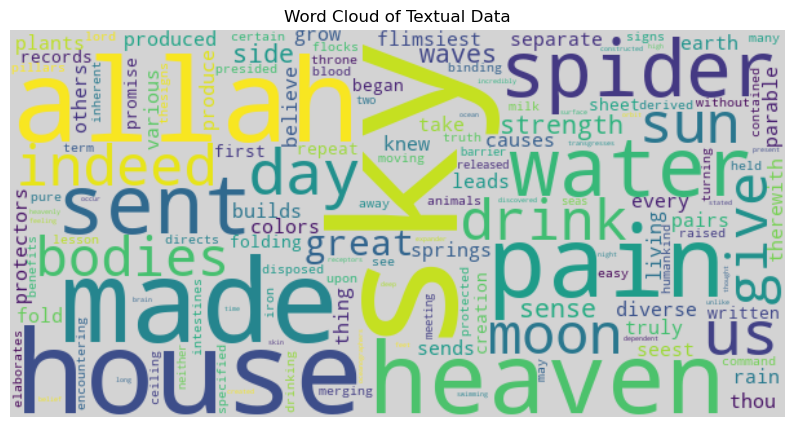

In [15]:
text_data = df['cleaned_islamic_data']
# Generate a WordCloud
wordcloud = WordCloud(width=600, height=300, background_color='lightgray').generate(' '.join(text_data))
# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Textual Data')
plt.show()

# Word Cloud For scientific Discovery

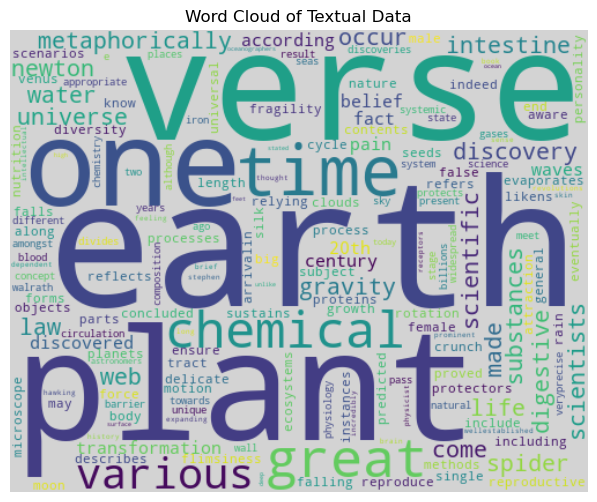

In [16]:
data1 = df['cleaned_scientific_data']
# Generate a WordCloud
wordcloud = WordCloud(width=500, height=400, background_color='lightgray').generate(' '.join(data1))
# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Textual Data')
plt.show()

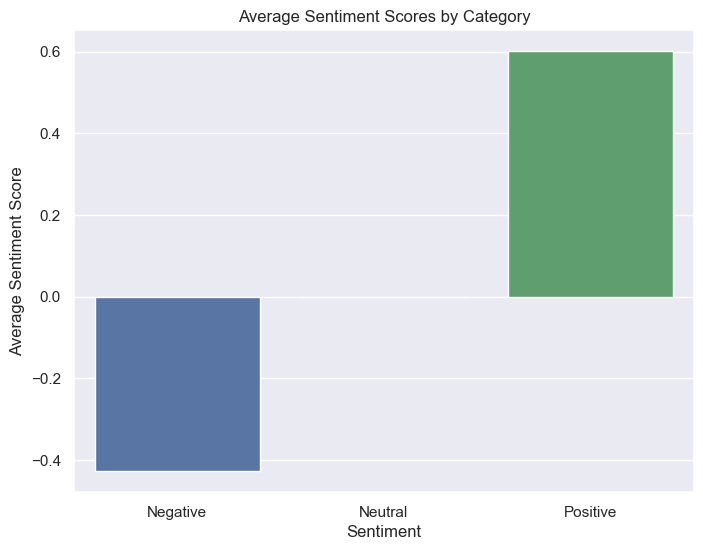

In [19]:
a = SentimentIntensityAnalyzer()
# Calculate sentiment scores for each row
df['Sentiment_Scores'] = df['Islamic_Data'].apply(lambda x: a.polarity_scores(x)['compound'])
def sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
# Apply sentiment classification
df['Sentiment'] = df['Sentiment_Scores'].apply(sentiment)
# Calculate average sentiment scores for each sentiment category
avg_sentiment = df.groupby('Sentiment')['Sentiment_Scores'].mean().reset_index()
# Create a barplot of average sentiment scores
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_sentiment, x='Sentiment', y='Sentiment_Scores',order=['Negative', 'Neutral', 'Positive'])
plt.title('Average Sentiment Scores by Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Sentiment Score')
plt.show()


# Correlation Analysis

In [22]:
tf_vectorizer = TfidfVectorizer()
tfidf_matrix_islamic = tf_vectorizer.fit_transform(df['cleaned_islamic_data'])
# Transform the scientific data using the same vectorizer
tfidf_matrix_scientific = tf_vectorizer.transform(df['cleaned_scientific_data'])
cosine_sim = cosine_similarity(tfidf_matrix_islamic, tfidf_matrix_scientific)
# Print the cosine similarity matrix
print(" Similarity of Cosine Matrix:\n")
print(cosine_sim)

 Similarity of Cosine Matrix:

[[0.24858601 0.         0.21509076 0.         0.         0.
  0.         0.12947121 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.51901856 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.18773865 0.         0.32526909 0.         0.         0.14195307
  0.         0.26265846 0.18773865 0.         0.         0.
  0.         0.        ]
 [0.         0.10849358 0.26471088 0.         0.         0.
  0.15933942 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.13739129 0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.16464166 0.08721114
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.05594466 0.         0.         0.         0.
  0.22070848 0.        

# Visualization

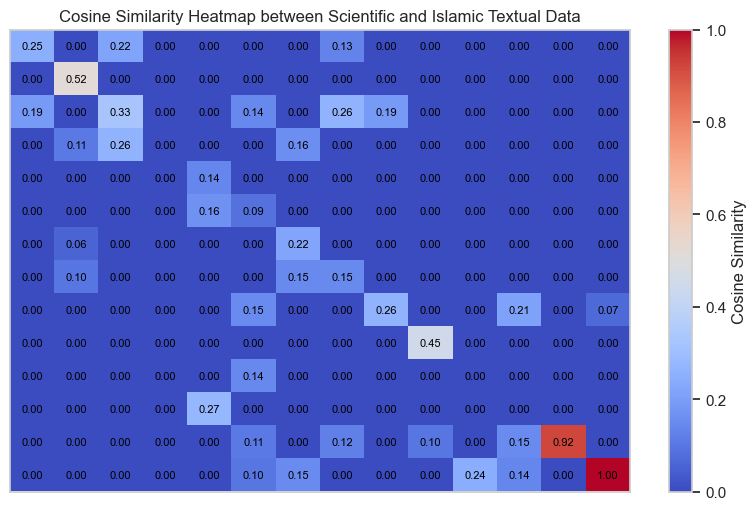

In [166]:
import matplotlib.pyplot as plt

# Assuming cosine_sim is your cosine similarity matrix
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(cosine_sim, cmap="coolwarm", aspect='auto')
plt.colorbar(heatmap, label='Cosine Similarity')
plt.title('Cosine Similarity Heatmap between Scientific and Islamic Textual Data')

# Display the values in the heatmap boxes
for i in range(len(cosine_sim)):
    for j in range(len(cosine_sim[0])):
        plt.text(j, i, "{:.2f}".format(cosine_sim[i, j]), ha="center", va="center", color="black", fontsize=8)

plt.xticks([])  # To remove x-axis ticks
plt.yticks([])  # To remove y-axis ticks
plt.show()
